<a href="https://colab.research.google.com/github/Robertagcn/Robertagcn/blob/main/Aulas_gratuitas_Trading_com_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Trading com Dados
* Aula 01 - Biblioteca Fundamentus: como trabalhar com dados fundamentalistas no Python

In [8]:
# Instalando as bibliotecas
!pip install Fundamentus
!pip install requests-cache

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 47 kB 2.6 MB/s 
     |████████████████████████████████| 62 kB 1.6 MB/s 
     |████████████████████████████████| 140 kB 34.6 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
import fundamentus
import requests_cache
import requests
import time, logging
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
# Trazer todos os papéis da bolsa
df = fundamentus.get_resultado()

In [14]:
df

Multiples,cotacao,pl,pvp,psr,dy,pa,pcg,pebit,pacl,evebit,evebitda,mrgebit,mrgliq,roic,roe,liqc,liq2m,patrliq,divbpatr,c5y
papel,,,,,,,,,,,,,,,,,,,,
AALR3,19.90,-42.63,2.06,2.121,0.0000,0.915,-25.32,31.75,-2.50,39.42,15.31,0.0668,-0.0422,0.0330,-0.0482,0.83,6.176920e+06,1.145370e+09,0.71,0.0086
ABCB3,0.00,0.00,0.00,0.000,0.0000,0.000,0.00,0.00,0.00,0.00,0.00,0.0000,0.0000,0.0000,0.1418,0.00,0.000000e+00,4.910570e+09,0.00,0.2080
ABCB4,19.92,6.47,0.92,0.000,0.0577,0.000,0.00,0.00,0.00,0.00,0.00,0.0000,0.0000,0.0000,0.1418,0.00,1.372350e+07,4.910570e+09,0.00,0.2080
ABEV3,15.48,18.00,2.83,3.169,0.0390,1.784,56.17,15.73,-22.56,14.92,11.15,0.2015,0.1827,0.1533,0.1570,1.13,3.635440e+08,8.626310e+10,0.04,0.1195
ABYA3,4.91,-214.80,1.76,2.055,0.0000,0.527,1.98,19.96,-2.75,33.67,33.67,0.1029,-0.0096,0.0278,-0.0082,2.09,0.000000e+00,2.920600e+08,1.31,0.1641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WLMM3,22.00,7.92,1.39,0.516,0.0402,1.141,2.75,7.98,3.47,7.10,6.83,0.0647,0.0652,0.1710,0.1750,5.59,1.362730e+03,5.777790e+08,0.02,0.2890
WLMM4,27.00,9.72,1.70,0.634,0.0360,1.401,3.37,9.80,4.26,8.92,8.57,0.0647,0.0652,0.1710,0.1750,5.59,1.956000e+04,5.777790e+08,0.02,0.2890
WMBY3,25.39,-19.30,2.87,0.836,0.0000,0.182,1.20,8.62,-1.50,25.02,25.02,0.0970,-0.0705,0.0239,-0.1486,1.44,0.000000e+00,2.124390e+08,6.51,-0.1448


In [13]:
# Saber quais os resultados a plataforma informa
df.columns

Index(['cotacao', 'pl', 'pvp', 'psr', 'dy', 'pa', 'pcg', 'pebit', 'pacl',
       'evebit', 'evebitda', 'mrgebit', 'mrgliq', 'roic', 'roe', 'liqc',
       'liq2m', 'patrliq', 'divbpatr', 'c5y'],
      dtype='object', name='Multiples')

In [15]:
# Checando os tipos de dados
df.dtypes

Multiples
cotacao     float64
pl          float64
pvp         float64
psr         float64
dy          float64
pa          float64
pcg         float64
pebit       float64
pacl        float64
evebit      float64
evebitda    float64
mrgebit     float64
mrgliq      float64
roic        float64
roe         float64
liqc        float64
liq2m       float64
patrliq     float64
divbpatr    float64
c5y         float64
dtype: object

In [17]:
df.describe()

Multiples,cotacao,pl,pvp,psr,dy,pa,pcg,pebit,pacl,evebit,evebitda,mrgebit,mrgliq,roic,roe,liqc,liq2m,patrliq,divbpatr,c5y
count,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,9.680000e+02,9.680000e+02,968.000000,968.000000
mean,50.226973,76.746973,1489.357304,143.250656,0.039302,1.976914,13.708864,330.688512,-7.682045,394.633037,-5.655764,-3.648160,-3.441663,0.080939,28.085214,1.890826,2.146035e+07,6.090832e+09,44.463264,0.262989
std,360.512342,1485.616557,32188.493798,4050.870604,0.197728,23.944553,524.358464,10691.693514,201.102033,12108.200012,303.918372,38.584138,82.588332,0.426277,619.331746,4.296725,1.235563e+08,2.517966e+10,964.342979,2.913381
min,0.000000,-3584.820000,-228.000000,-20.054000,0.000000,0.000000,-5667.170000,-7214.410000,-6206.380000,-7466.350000,-7466.350000,-787.000000,-1567.290000,-6.238700,-82.468300,0.000000,0.000000e+00,-2.016640e+10,-49.850000,-0.870300
25%,4.547500,-0.090000,0.200000,0.062750,0.000000,0.092750,0.000000,0.000000,-1.502500,0.000000,0.000000,0.000000,-0.010300,0.000000,0.003300,0.517500,0.000000e+00,1.282450e+08,0.000000,0.000000
50%,12.000000,4.550000,1.095000,0.651500,0.000000,0.391500,0.990000,2.885000,-0.150000,5.060000,4.340000,0.073100,0.030950,0.059400,0.108700,1.300000,0.000000e+00,1.057310e+09,0.250000,0.101100
75%,28.612500,12.665000,2.130000,1.737500,0.025925,0.897250,4.907500,9.437500,0.000000,12.245000,9.345000,0.193875,0.138800,0.148550,0.235450,2.050000,1.021622e+06,3.678840e+09,1.010000,0.198800
max,10081.900000,34939.300000,723708.000000,125972.000000,3.621600,721.228000,14895.900000,332515.000000,346.000000,376226.000000,4389.060000,58.704400,1181.740000,5.230100,13632.000000,66.470000,2.457170e+09,4.105450e+11,21227.000000,63.540700


# **Screening de ativos**

In [21]:
#Trazer papéis de acordo com situações específicas
#Coluna Preço/Lucro
df.pl

papel
AALR3     -42.63
ABCB3       0.00
ABCB4       6.47
ABEV3      18.00
ABYA3    -214.80
           ...  
WLMM3       7.92
WLMM4       9.72
WMBY3     -19.30
WSON33      8.07
YDUQ3     356.27
Name: pl, Length: 968, dtype: float64

In [22]:
#Trazer todos os papeis com P/L acima de 0
df[ df.pl > 0 ]

Multiples,cotacao,pl,pvp,psr,dy,pa,pcg,pebit,pacl,evebit,evebitda,mrgebit,mrgliq,roic,roe,liqc,liq2m,patrliq,divbpatr,c5y
papel,,,,,,,,,,,,,,,,,,,,
ABCB4,19.92,6.47,0.92,0.000,0.0577,0.000,0.00,0.00,0.00,0.00,0.00,0.0000,0.0000,0.0000,0.1418,0.00,1.372350e+07,4.910570e+09,0.00,0.2080
ABEV3,15.48,18.00,2.83,3.169,0.0390,1.784,56.17,15.73,-22.56,14.92,11.15,0.2015,0.1827,0.1533,0.1570,1.13,3.635440e+08,8.626310e+10,0.04,0.1195
ACES3,95.27,8.79,2.28,1.693,0.0000,1.438,6.40,7.20,20.77,6.54,6.54,0.2352,0.1927,0.2690,0.2595,2.05,0.000000e+00,3.105800e+09,0.09,0.1334
ACES4,94.73,8.74,2.27,1.683,0.0000,1.430,6.37,7.16,20.65,6.50,6.50,0.2352,0.1927,0.2690,0.2595,2.05,0.000000e+00,3.105800e+09,0.09,0.1334
AEDU11,37.35,20.13,1.13,1.405,0.0000,0.732,5.77,13.93,-7.31,16.14,10.82,0.1008,0.0698,0.0577,0.0560,2.04,0.000000e+00,2.415400e+09,0.30,0.2090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WIZS3,8.03,10.20,3.36,1.544,0.0732,0.658,-9.17,3.84,-1.82,3.88,3.36,0.4021,0.2118,0.2012,0.3289,0.71,7.244220e+06,3.827010e+08,0.61,0.1281
WLMM3,22.00,7.92,1.39,0.516,0.0402,1.141,2.75,7.98,3.47,7.10,6.83,0.0647,0.0652,0.1710,0.1750,5.59,1.362730e+03,5.777790e+08,0.02,0.2890
WLMM4,27.00,9.72,1.70,0.634,0.0360,1.401,3.37,9.80,4.26,8.92,8.57,0.0647,0.0652,0.1710,0.1750,5.59,1.956000e+04,5.777790e+08,0.02,0.2890


In [30]:
#Para mais de uma regra lógica
#P/L acima de 0, margem EBIT acima de 40% e dividend yield acima de 5%
filtro = df[ (df.pl > 0) & (df.mrgebit > 0.4) & (df.dy > 0.05) ]

In [28]:
filtro

Multiples,cotacao,pl,pvp,psr,dy,pa,pcg,pebit,pacl,evebit,evebitda,mrgebit,mrgliq,roic,roe,liqc,liq2m,patrliq,divbpatr,c5y
papel,,,,,,,,,,,,,,,,,,,,
B3SA3,12.64,17.28,3.73,7.709,0.0560,1.627,12.69,13.42,-7.70,12.99,10.95,0.5744,0.4461,0.1792,0.2160,1.57,4.394420e+08,2.065320e+10,0.61,0.2573
CEBR3,12.80,4.83,0.99,2.242,1.1816,0.697,1.55,5.42,1.64,2.46,2.28,0.4140,0.6340,0.2140,0.2058,7.35,3.338210e+04,9.285700e+08,0.00,-0.3888
CEBR5,10.01,3.78,0.78,1.753,1.5110,0.545,1.21,4.23,1.28,1.28,1.19,0.4140,0.6340,0.2140,0.2058,7.35,5.676390e+04,9.285700e+08,0.00,-0.3888
CEBR6,11.08,4.18,0.86,1.941,1.5016,0.604,1.34,4.69,1.42,1.73,1.61,0.4140,0.6340,0.2140,0.2058,7.35,2.621230e+05,9.285700e+08,0.00,-0.3888
EEEL3,421.01,33.42,1.87,3.856,0.2999,0.866,3.78,7.72,-7.64,7.26,7.08,0.4994,0.1041,0.1386,0.0559,2.19,0.000000e+00,2.177320e+09,0.26,0.0309
EEEL4,410.00,32.55,1.82,3.755,0.3387,0.844,3.68,7.52,-7.44,7.06,6.88,0.4994,0.1041,0.1386,0.0559,2.19,0.000000e+00,2.177320e+09,0.26,0.0309
EGIE3,40.58,18.87,4.18,2.710,0.0552,0.835,14.87,5.49,-1.38,8.19,6.95,0.4939,0.1438,0.1737,0.2215,1.40,7.458630e+07,7.923410e+09,2.60,0.1363
FESA3,58.00,4.65,1.80,1.698,0.0504,1.345,4.11,4.05,7.21,3.71,3.29,0.4188,0.3656,0.4398,0.3878,3.91,1.286680e+04,2.843470e+09,0.13,0.2353
FESA4,57.09,4.57,1.77,1.671,0.0564,1.324,4.05,3.99,7.09,3.65,3.24,0.4188,0.3656,0.4398,0.3878,3.91,9.053260e+06,2.843470e+09,0.13,0.2353


In [29]:
filtro.shape

(20, 20)

In [33]:
#Ordenar os dados de dividend yield do maior dado para o menor
#O inplace não chama a tabela de volta
filtro.sort_values('dy', ascending = False, inplace = True)

In [34]:
filtro.head()

Multiples,cotacao,pl,pvp,psr,dy,pa,pcg,pebit,pacl,evebit,evebitda,mrgebit,mrgliq,roic,roe,liqc,liq2m,patrliq,divbpatr,c5y
papel,,,,,,,,,,,,,,,,,,,,
SYNE3,4.55,0.56,0.45,0.298,1.9150,0.156,0.94,0.45,-0.86,0.84,0.80,0.6570,0.5688,0.4055,0.7985,4.43,2023080.0,1.543340e+09,0.81,0.3681
CEBR5,10.01,3.78,0.78,1.753,1.5110,0.545,1.21,4.23,1.28,1.28,1.19,0.4140,0.6340,0.2140,0.2058,7.35,56763.9,9.285700e+08,0.00,-0.3888
CEBR6,11.08,4.18,0.86,1.941,1.5016,0.604,1.34,4.69,1.42,1.73,1.61,0.4140,0.6340,0.2140,0.2058,7.35,262123.0,9.285700e+08,0.00,-0.3888
CEBR3,12.80,4.83,0.99,2.242,1.1816,0.697,1.55,5.42,1.64,2.46,2.28,0.4140,0.6340,0.2140,0.2058,7.35,33382.1,9.285700e+08,0.00,-0.3888
TRPN3,0.71,0.44,0.54,0.263,1.0474,0.399,0.59,0.36,0.59,-0.35,-0.35,0.7228,0.5929,5.2301,1.2235,3.61,0.0,5.935800e+07,0.00,0.0577


In [35]:
filtro.index

Index(['SYNE3', 'CEBR5', 'CEBR6', 'CEBR3', 'TRPN3', 'PETR4', 'PETR3', 'EEEL4',
       'EEEL3', 'VALE3', 'TAEE11', 'TAEE4', 'TAEE3', 'WIZS3', 'TRPL4', 'FESA4',
       'B3SA3', 'PSSA3', 'EGIE3', 'FESA3'],
      dtype='object', name='papel')

Text(0.5, 1.0, 'Ações com P/L maior de 0, Margem EBIT maior que 40%, DY acima de 5% e ordenadas por DY')

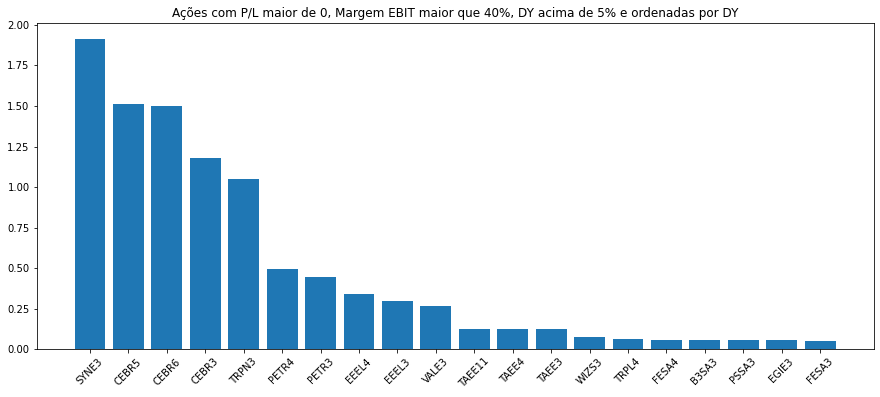

In [40]:
#Criando os gráficos
plt.figure(figsize = (15,6));
#Gráfico de barra
#Primeiro atribui ao eixo x e o segundo ao eixo y
plt.bar(filtro.index, filtro.dy);
#Para colocar os códicos em 45º
plt.xticks(rotation = 45)
#Adicionar um título
plt.title('Ações com P/L maior de 0, Margem EBIT maior que 40%, DY acima de 5% e ordenadas por DY')

#Resultado por setor
https://fundamentus.com.br/resultado.php?setor=2

In [42]:
fundamentus.list_papel_setor(8)

['PCAR3',
 'PFRM3',
 'DMVF3',
 'ASAI3',
 'CRFB3',
 'GMAT3',
 'VVEO3',
 'PGMN3',
 'BLAU3',
 'HYPE3',
 'PNVL3',
 'RADL3']

#Método Resultado Raw
* Resultado sem pré processamento

In [43]:
fundamentus.get_resultado_raw()

Multiples,Cotação,P/L,P/VP,PSR,Div.Yield,P/Ativo,P/Cap.Giro,P/EBIT,P/Ativ Circ.Liq,EV/EBIT,EV/EBITDA,Mrg Ebit,Mrg. Líq.,Liq. Corr.,ROIC,ROE,Liq.2meses,Patrim. Líq,Dív.Brut/ Patrim.,Cresc. Rec.5a
papel,,,,,,,,,,,,,,,,,,,,
AALR3,19.90,-42.63,2.06,2.121,0.0000,0.915,-25.32,31.75,-2.50,39.42,15.31,0.0668,-0.0422,0.83,0.0330,-0.0482,6.176920e+06,1.145370e+09,0.71,0.0086
ABCB3,0.00,0.00,0.00,0.000,0.0000,0.000,0.00,0.00,0.00,0.00,0.00,0.0000,0.0000,0.00,0.0000,0.1418,0.000000e+00,4.910570e+09,0.00,0.2080
ABCB4,19.92,6.47,0.92,0.000,0.0577,0.000,0.00,0.00,0.00,0.00,0.00,0.0000,0.0000,0.00,0.0000,0.1418,1.372350e+07,4.910570e+09,0.00,0.2080
ABEV3,15.48,18.00,2.83,3.169,0.0390,1.784,56.17,15.73,-22.56,14.92,11.15,0.2015,0.1827,1.13,0.1533,0.1570,3.635440e+08,8.626310e+10,0.04,0.1195
ABYA3,4.91,-214.80,1.76,2.055,0.0000,0.527,1.98,19.96,-2.75,33.67,33.67,0.1029,-0.0096,2.09,0.0278,-0.0082,0.000000e+00,2.920600e+08,1.31,0.1641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WLMM3,22.00,7.92,1.39,0.516,0.0402,1.141,2.75,7.98,3.47,7.10,6.83,0.0647,0.0652,5.59,0.1710,0.1750,1.362730e+03,5.777790e+08,0.02,0.2890
WLMM4,27.00,9.72,1.70,0.634,0.0360,1.401,3.37,9.80,4.26,8.92,8.57,0.0647,0.0652,5.59,0.1710,0.1750,1.956000e+04,5.777790e+08,0.02,0.2890
WMBY3,25.39,-19.30,2.87,0.836,0.0000,0.182,1.20,8.62,-1.50,25.02,25.02,0.0970,-0.0705,1.44,0.0239,-0.1486,0.000000e+00,2.124390e+08,6.51,-0.1448


#Método Get Papel
* Utilizado quando se quer trazer um papel específico

In [45]:
fundamentus.get_papel('WEGE3')

,Papel,Tipo,Empresa,Setor,Subsetor,Cotacao,Data_ult_cot,Min_52_sem,Max_52_sem,Vol_med_2m,...,Ativo_Circulante,Div_Bruta,Div_Liquida,Patrim_Liq,Receita_Liquida_12m,EBIT_12m,Lucro_Liquido_12m,Receita_Liquida_3m,EBIT_3m,Lucro_Liquido_3m
WEGE3,WEGE3,ON N1,WEG SA ON N1,Máquinas e Equipamentos,"Motores, Compressores e Outros",30.21,2022-09-02,22.68,40.69,217367000,...,17567000000,2853830000,-218622000,13413900000,26752100000,4680650000,3543840000,7185790000,1246860000,912965000


In [46]:
#Informação sem data prep
fundamentus.get_detalhes_raw('WEGE3')

[           0                               1                2           3
 0     ?Papel                           WEGE3         ?Cotação       30.21
 1      ?Tipo                           ON N1    ?Data últ cot  02/09/2022
 2   ?Empresa                    WEG SA ON N1      ?Min 52 sem       22.68
 3     ?Setor         Máquinas e Equipamentos      ?Max 52 sem       40.69
 4  ?Subsetor  Motores, Compressores e Outros  ?Vol $ méd (2m)   217367000,
                    0             1                        2           3
 0  ?Valor de mercado  126801000000  ?Últ balanço processado  30/06/2022
 1    ?Valor da firma  126582000000              ?Nro. Ações  4197320000,
              0           1                             2  \
 0   Oscilações  Oscilações  Indicadores fundamentalistas   
 1          Dia       6,45%                          ?P/L   
 2          Mês       6,79%                         ?P/VP   
 3      30 dias       6,45%                       ?P/EBIT   
 4     12 meses     -14,

In [47]:
varejo = fundamentus.list_papel_setor(8)

In [48]:
varejo

['PCAR3',
 'PFRM3',
 'DMVF3',
 'ASAI3',
 'CRFB3',
 'GMAT3',
 'VVEO3',
 'PGMN3',
 'BLAU3',
 'HYPE3',
 'PNVL3',
 'RADL3']

In [49]:
fundamentus.get_papel(varejo)

,Tipo,Empresa,Setor,Subsetor,Cotacao,Data_ult_cot,Min_52_sem,Max_52_sem,Vol_med_2m,Valor_de_mercado,...,Ativo_Circulante,Div_Bruta,Div_Liquida,Patrim_Liq,Receita_Liquida_12m,EBIT_12m,Lucro_Liquido_12m,Receita_Liquida_3m,EBIT_3m,Lucro_Liquido_3m
ASAI3,ON NM,ASSAI ON NM,Comércio e Distribuição,Alimentos,18.90,2022-09-02,11.21,19.29,137111000,25483500000,...,10476000000,11366000000,8258000000,3311000000,47135000000,3518000000,1598000000,13291000000,946000000,319000000
BLAU3,ON NM,BLAU ON NM,Comércio e Distribuição,Medicamentos e Outros Produtos,32.26,2022-09-02,21.74,50.35,15479600,5787250000,...,1694700000,316821000,-482127000,1720940000,1348100000,419994000,313426000,365239000,116092000,112400000
CRFB3,ON NM,CARREFOUR BR ON NM,Comércio e Distribuição,Alimentos,20.35,2022-09-02,13.86,23.39,73011800,42797000000,...,34156000000,17790000000,13829000000,19936000000,87014000000,4257000000,2645000000,25279000000,1314000000,620000000
DMVF3,ON NM,D1000VFARMA ON NM,Comércio e Distribuição,Medicamentos e Outros Produtos,5.09,2022-09-02,3.68,7.12,389912,257569000,...,402323000,39746000,-30636000,843217000,1312450000,101002000,18452000,374636000,41767000,12267000
GMAT3,ON NM,GRUPO MATEUS ON NM,Comércio e Distribuição,Alimentos,6.57,2022-09-02,3.28,8.28,35836200,14515400000,...,7083840000,2317290000,1427390000,6861070000,18571000000,1097200000,870729000,5201990000,315753000,261170000
HYPE3,ON,HYPERA ON,Comércio e Distribuição,Medicamentos e Outros Produtos,43.76,2022-09-02,26.19,44.02,113918000,27718500000,...,6408420000,8039250000,6540150000,10208000000,6648320000,2192610000,1357550000,1895640000,636618000,455783000
PCAR3,ON,PÃO DE AÇÚCAR ON,Comércio e Distribuição,Alimentos,21.60,2022-09-02,15.06,30.52,51477500,5824160000,...,15392000000,8486000000,4568000000,14269000000,47145000000,3274000000,1913000000,10116000000,708000000,-173000000
PFRM3,ON NM,PROFARMA ON NM,Comércio e Distribuição,Medicamentos e Outros Produtos,3.73,2022-09-02,3.08,5.90,668159,461822000,...,2934350000,1036650000,840098000,1165640000,7031390000,287161000,95536000,1929810000,120355000,66232000
PGMN3,ON NM,PAGUE MENOS ON NM,Comércio e Distribuição,Medicamentos e Outros Produtos,5.21,2022-09-02,4.07,13.51,6795480,2312100000,...,3260960000,992616000,647519000,2172580000,7898890000,352028000,127920000,2070350000,123844000,53553000
PNVL3,ON,PANVEL FARMÁCIAS ON,Comércio e Distribuição,Medicamentos e Outros Produtos,12.19,2022-09-02,9.06,16.88,6574570,1833100000,...,1411570000,872225000,745255000,1079580000,3584130000,94405900,82820000,986276000,34664000,23362000
